# Importing libraries

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import skimage
from skimage import transform
from tensorflow import keras

# Function for calcualting the accuracy of the classification

In [0]:
def acc(output,label):
    test=((output[:,0]-label)==0)*1.0
    return sum(test)/len(test)*100

# Network inputs

Loading data (Digits)

In [0]:
ix=28*28 # Number of features
epochs=20
digits=[0,1] # Digits to classify

# Loading data
mnist=keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# Training

indices=np.append(np.where(train_labels==digits[0]),np.where(train_labels==digits[1]))
train=train_images[indices]
train=train.reshape(len(train),28*28) # 2D to 1D
# Additional column is added to the training set instead of calculating biases
train=np.concatenate((train,np.ones([len(train),1])),axis=1) # to include bias w_0
train_lbl=train_labels[indices]
train_lbl=(train_lbl==digits[1])*1.0

# Test

indices=np.append(np.where(test_labels==digits[0]),np.where(test_labels==digits[1]))
test=test_images[indices]
test=test.reshape(len(test),28*28)
test=np.concatenate((test,np.ones([len(test),1])),axis=1)
test_lbl=test_labels[indices]
test_lbl=(test_lbl==digits[1])*1.0

# Perceptron

In [0]:
# Training
w=np.random.rand(ix+1,1) # Weights initialization
print('\nTraining:\n')
for epoch in range(epochs):
    loss=0
    for i in range(len(train)):
        logits=np.einsum('i,ij->j',train[i],w) # multiplication of train and w
        logits=(logits>0)*1.0 # Activation function
        error=train_lbl[i]-logits # Error calculation
        w=w+train[i].reshape(train[i].shape[0],1)*error # Weight update
        loss+=abs(error)

    # Training set accuracy
    logits=np.einsum('ij,jk->ik',train,w)
    logits=(logits>0)*1.0
    print('Epoch: {:}, error: {:0.2f} accuracy: {:0.2f}'.format(epoch,loss[0],acc(logits,train_lbl)))


# Test set accuracy
print('\nTest:\n')
logits=np.einsum('ij,jk->ik',test,w)
logits=(logits>0)*1.0
print('Test accuracy: {:0.2f}'.format(acc(logits,test_lbl)))


Training:

Epoch: 0, error: 4.00 accuracy: 71.72
Epoch: 1, error: 6.00 accuracy: 54.12
Epoch: 2, error: 7.00 accuracy: 95.92
Epoch: 3, error: 6.00 accuracy: 87.64
Epoch: 4, error: 5.00 accuracy: 97.89
Epoch: 5, error: 5.00 accuracy: 96.06
Epoch: 6, error: 7.00 accuracy: 98.40
Epoch: 7, error: 7.00 accuracy: 98.61
Epoch: 8, error: 5.00 accuracy: 99.18
Epoch: 9, error: 8.00 accuracy: 98.87
Epoch: 10, error: 5.00 accuracy: 98.85
Epoch: 11, error: 5.00 accuracy: 98.50
Epoch: 12, error: 5.00 accuracy: 99.84
Epoch: 13, error: 7.00 accuracy: 99.25
Epoch: 14, error: 5.00 accuracy: 99.55
Epoch: 15, error: 5.00 accuracy: 99.70
Epoch: 16, error: 6.00 accuracy: 99.54
Epoch: 17, error: 4.00 accuracy: 99.42
Epoch: 18, error: 4.00 accuracy: 99.64
Epoch: 19, error: 5.00 accuracy: 99.72
Epoch: 20, error: 5.00 accuracy: 99.58
Epoch: 21, error: 5.00 accuracy: 99.69
Epoch: 22, error: 3.00 accuracy: 99.75
Epoch: 23, error: 3.00 accuracy: 99.79
Epoch: 24, error: 4.00 accuracy: 99.64
Epoch: 25, error: 5.00 

# Difference between Perceptron and ADALINE

![alt text](https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png)

# Image rotation

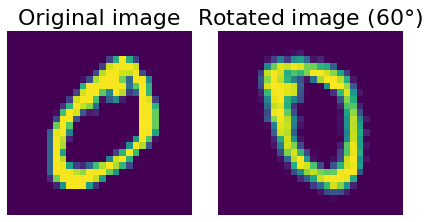

In [0]:
# Loading data
mnist=keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Original image
image=train_images[1]

# Rotated image
imager=skimage.transform.rotate(image,60)

# Plot
plt.subplot(121);plt.imshow(image,cmap='viridis');plt.grid(False);plt.axis('off');plt.title('Original image',fontsize=22);plt.tight_layout()
plt.subplot(122);plt.imshow(imager,cmap='viridis');plt.grid(False);plt.axis('off');plt.title('Rotated image (60$\degree$)',fontsize=22);plt.tight_layout()



# Task 1: Adaline

In [0]:
def adaline(train, train_lbl, epochs):
  # Training
  alpha = 1 # learning rate
  w=np.random.rand(ix+1,1) # Weights initialization
  print('\nTraining:\n')
  for epoch in range(epochs):
      loss=0
      for i in range(len(train)):
          s=np.einsum('i,ij->j',train[i],w) # <w,x>
          g=1/(1 + np.exp(-0.0001*s)) # g(s)
          dy=train_lbl[i]-g # y^m - y
          error=train_lbl[i] - (s>0)*1.0
          dg = 0.0001*g*(1 - g)
          dw = alpha * dg * dy * train[i].reshape(train[i].shape[0],1)
          w = w + dw # weight update
          loss+=abs(error)

      # Training set accuracy
      logits=np.einsum('ij,jk->ik',train,w)
      logits=(logits>0)*1.0
      # print('Epoch: {:}, error: {:0.2f} accuracy: {:0.2f}'.format(epoch,loss[0],acc(logits,train_lbl)))
  return w

def acc_calc(w, test, test_lbl, test_angle):
  logits=np.einsum('ij,jk->ik',test,w)
  logits=(logits>0)*1.0
  print('Test angle: {:0.2f}, Test accuracy: {:0.2f}'.format(test_angle, acc(logits,test_lbl)))
  return acc(logits,test_lbl)

# Task 2

In [0]:
# function to rotate images
def image_rotation(images, labels, angle):
  indices=np.append(np.where(labels==digits[0]),np.where(labels==digits[1]))
  temp=images[indices]
  imagesr = np.array([skimage.transform.rotate(img, angle) for img in temp])
  imagesr = imagesr.reshape(len(imagesr),28*28) # 2D to 1D
  imagesr = np.concatenate((imagesr,np.ones([len(imagesr),1])),axis=1) # to include bias w_0
  return imagesr

In [0]:
w = adaline(train, train_lbl, 20)


Training:

Epoch: 0, error: 586.00 accuracy: 94.12
Epoch: 1, error: 63.00 accuracy: 99.33
Epoch: 2, error: 43.00 accuracy: 99.59
Epoch: 3, error: 36.00 accuracy: 99.67
Epoch: 4, error: 30.00 accuracy: 99.70
Epoch: 5, error: 28.00 accuracy: 99.76
Epoch: 6, error: 28.00 accuracy: 99.76
Epoch: 7, error: 27.00 accuracy: 99.77
Epoch: 8, error: 26.00 accuracy: 99.77
Epoch: 9, error: 27.00 accuracy: 99.78
Epoch: 10, error: 27.00 accuracy: 99.79
Epoch: 11, error: 27.00 accuracy: 99.79
Epoch: 12, error: 27.00 accuracy: 99.79
Epoch: 13, error: 26.00 accuracy: 99.79
Epoch: 14, error: 26.00 accuracy: 99.79
Epoch: 15, error: 26.00 accuracy: 99.79
Epoch: 16, error: 26.00 accuracy: 99.79
Epoch: 17, error: 25.00 accuracy: 99.79
Epoch: 18, error: 25.00 accuracy: 99.79
Epoch: 19, error: 25.00 accuracy: 99.79


In [0]:
test_acc = []
for angle in range(0,91,10):
  test = image_rotation(test_images, test_labels, angle)
  test_acc.append(acc_calc(w, test, test_lbl, angle))

Test angle: 0.00, Test accuracy: 99.91
Test angle: 10.00, Test accuracy: 99.86
Test angle: 20.00, Test accuracy: 99.72
Test angle: 30.00, Test accuracy: 99.39
Test angle: 40.00, Test accuracy: 98.53
Test angle: 50.00, Test accuracy: 95.27
Test angle: 60.00, Test accuracy: 86.67
Test angle: 70.00, Test accuracy: 74.70
Test angle: 80.00, Test accuracy: 63.07
Test angle: 90.00, Test accuracy: 53.76


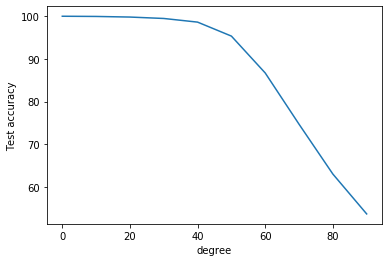

In [0]:
# plot test angle vs test accuracy
# the accuracy decreases as the rotation angle increase
plt.plot(range(0,91,10), test_acc)
plt.xlabel('degree')
plt.ylabel('Test accuracy')
plt.show()

# Task 3

In [0]:
# calculate test accuracy with angle from 0 to 90 degree
test_acc = []
for deg in range(00,91,10):
  train_angle = deg
  trainr = image_rotation(train_images, train_labels, train_angle)
  trainr2 = np.concatenate((train, trainr))
  train_lbl2 = np.concatenate((train_lbl, train_lbl))
  test_angle= deg
  testr = image_rotation(test_images, test_labels, test_angle)
  w = adaline(trainr2, train_lbl2, 50)
  test_acc.append(acc_calc(w, testr, test_lbl, test_angle))


Training:

Test angle: 0.00, Test accuracy: 99.95

Training:

Test angle: 10.00, Test accuracy: 99.86

Training:

Test angle: 20.00, Test accuracy: 99.76

Training:

Test angle: 30.00, Test accuracy: 99.57

Training:

Test angle: 40.00, Test accuracy: 99.39

Training:

Test angle: 50.00, Test accuracy: 99.05

Training:

Test angle: 60.00, Test accuracy: 98.01

Training:

Test angle: 70.00, Test accuracy: 96.97

Training:

Test angle: 80.00, Test accuracy: 96.45

Training:

Test angle: 90.00, Test accuracy: 95.89


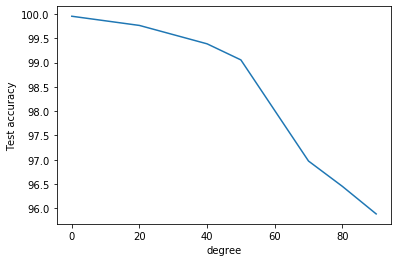

In [0]:
# plot test angle vs test accuracy
# the accuracies in the region of high rotation degree improved compared with task 2
plt.plot(range(0,91,10), test_acc)
plt.xlabel('degree')
plt.ylabel('Test accuracy')
plt.show()